In [1]:
# Libraries
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB,GaussianNB 

### Load Data

In [2]:
df = pd.read_csv('data/Suicide_Detection.csv',index_col=False )

In [3]:
df.shape

(232074, 3)

In [4]:
df.head()

,Unnamed: 0,text,class
0,2,Ex Wife Threatening SuicideRecently I left my ...,suicide
1,3,Am I weird I don't get affected by compliments...,non-suicide
2,4,Finally 2020 is almost over... So I can never ...,non-suicide
3,8,i need helpjust help me im crying so hard,suicide
4,9,"I’m so lostHello, my name is Adam (16) and I’v...",suicide


### Exploring Data


In [5]:
# import
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
df['class'].unique()

array(['suicide', 'non-suicide'], dtype=object)

In [7]:
# Drop column Unnamed: 0
df.drop('Unnamed: 0', axis=1, inplace = True)

In [8]:
df.columns

Index(['text', 'class'], dtype='object')

In [9]:
# Without na
df.isna().sum()

text     0
class    0
dtype: int64

In [10]:
# Balanced target values
df['class'].value_counts()

suicide        116037
non-suicide    116037
Name: class, dtype: int64

#### Balanced target values

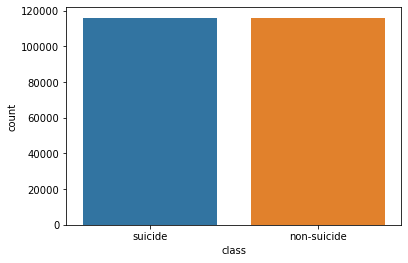

In [11]:
sns.countplot(data=df, x='class', order=df['class'].value_counts().index);

### Transform Data:  Fit_transform feature 'text'

In [12]:
vectorizer =  CountVectorizer()
counts = vectorizer.fit_transform(df['text'].values)
target = df['class'].values

### Train Test Split Holdout (20% Test - 80% Train)

In [13]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(counts, target, test_size=0.2,random_state=109) 


### Model Training

In [14]:
# Model Instantiate
classifier = MultinomialNB()

classifier.fit(X_train, y_train)

MultinomialNB()

### Tuning Model

In [15]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

### Evaluating Model

In [16]:
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

In [17]:
# predict
y_pred_train = classifier.predict(X_train)
y_pred_test  = classifier.predict(X_test)

# predict_proba
y_pred_train_proba = classifier.predict_proba(X_train)[:, 1]
y_pred_test_proba  = classifier.predict_proba(X_test)[:, 1]


In [18]:
# accuracy_score metric
train_acurracy = accuracy_score(y_train, y_pred_train)
test_acurracy = accuracy_score(y_test, y_pred_test)
train_acurracy, test_acurracy

(0.9055149494503364, 0.8984380049552946)

In [19]:
# roc_auc_score metric
roc_auc_train = roc_auc_score(y_train, y_pred_train_proba)
roc_auc_test = roc_auc_score(y_test, y_pred_test_proba)

roc_auc_train, roc_auc_test

(0.9675735876467451, 0.963168854064967)

In [20]:
# Classification Report
print(classification_report(y_pred_test, y_test))

              precision    recall  f1-score   support

 non-suicide       0.84      0.95      0.89     20204
     suicide       0.96      0.86      0.91     26211

    accuracy                           0.90     46415
   macro avg       0.90      0.90      0.90     46415
weighted avg       0.91      0.90      0.90     46415



In [21]:
example = ["I Lost my mom this year. I don't know what to do!!!", "I am crying constantely"]
example_counts = vectorizer.transform(example)
predictions = classifier.predict(example_counts)
predictions

array(['suicide', 'suicide'], dtype='<U11')

In [22]:
import joblib

joblib.dump( classifier, 'classifier.pkl')

['classifier.pkl']